#Classification of using Logistic Regression

In [1]:
pip install ucimlrepo

In [4]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

#Data Exploration

In [7]:
 X.shape

(858, 36)

In [8]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [9]:
X.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#checks missing values
X.isnull().sum().sum()

3622

In [11]:
#checking categorical values
col_names = X.columns

In [12]:
col_names

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [13]:
X.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [15]:
categorical_checker = X.select_dtypes(include=['object']).columns.tolist()

In [16]:
if len(categorical_checker) > 0:
    print("Categorical columns:")
    print(categorical_checker)
else:
    print("No categorical columns found in X.")

No categorical columns found in X.


# **No Categorical Values so Move on to Numerical Variables**

# **Explore Numerical values**

In [17]:
df_X = pd.DataFrame(X)

In [18]:
numerical = [var for var in df_X.columns if df_X[var].dtype != 'object']

In [19]:
print('There are {} numerical variables\n'.format(len(numerical)))
print('Numerical variables are: ', numerical)

There are 36 numerical variables

Numerical variables are:  ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


# **Explore Numerical values Problems**

**Recheck missing values**

In [20]:
df_X[numerical].isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [21]:
#checking for outliers
print(round(df_X[numerical].describe()),2)

         Age  Number of sexual partners  First sexual intercourse  \
count  858.0                      832.0                     851.0   
mean    27.0                        3.0                      17.0   
std      8.0                        2.0                       3.0   
min     13.0                        1.0                      10.0   
25%     20.0                        2.0                      15.0   
50%     25.0                        2.0                      17.0   
75%     32.0                        3.0                      18.0   
max     84.0                       28.0                      32.0   

       Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
count               802.0   845.0           845.0                845.0   
mean                  2.0     0.0             1.0                  0.0   
std                   1.0     0.0             4.0                  2.0   
min                   0.0     0.0             0.0                  0.0   
25%     

**Check for distribution of variables**

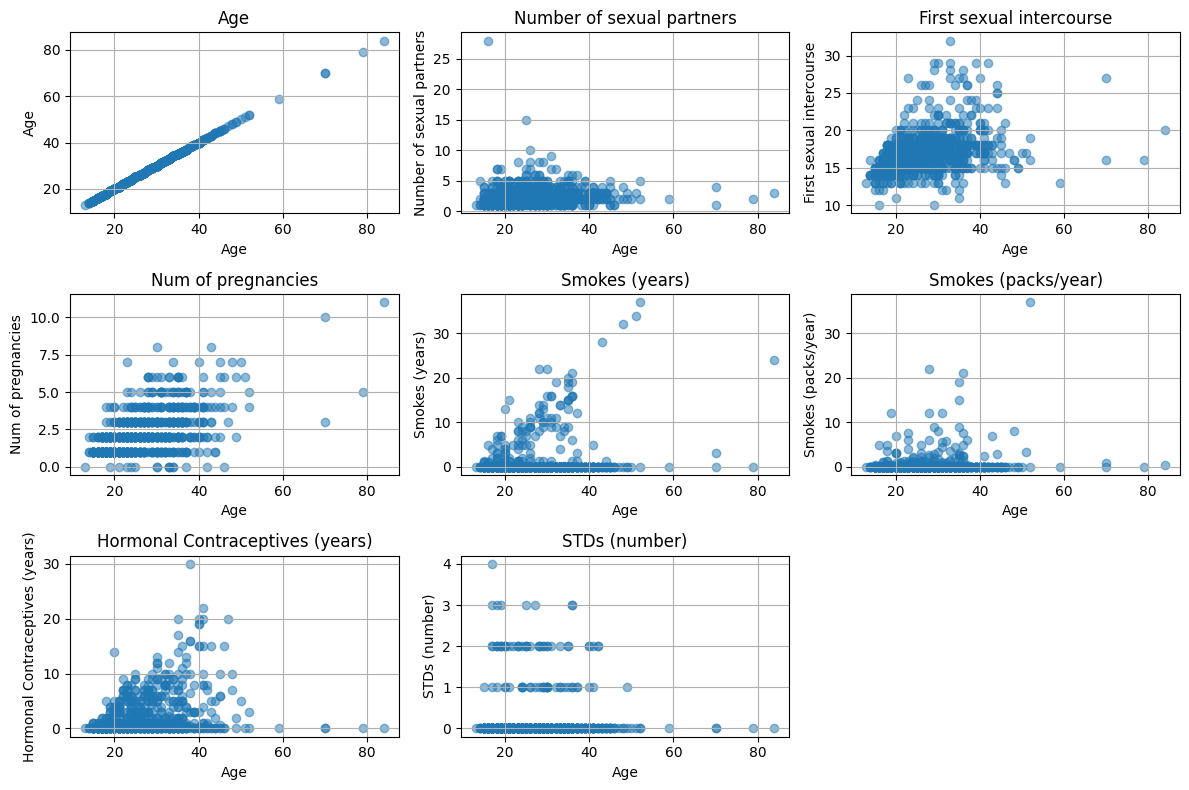

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_vars = [
    'Age', 'Number of sexual partners', 'First sexual intercourse',
    'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'STDs (number)'
]

X_G = pd.DataFrame(X, columns=numerical_vars)

plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_vars, start=1):
    plt.subplot(3, 3, i)

    plt.scatter(df_X['Age'], df_X[var], alpha=0.5)

    plt.title(var)
    plt.xlabel('Age')
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

# **Declare feature vector and target variable**

In [24]:
X = df_X.drop(['Age'], axis = 1)

y = df_X['Age']

# **Split data into separate training and test set**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
X_train.shape, X_test.shape

((600, 35), (258, 35))

# **Feature Engineering**

In [27]:
X_train.dtypes

Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                             float64
STDs:HIV                          

In [28]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == '0']

categorical

[]

In [29]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != '0']

numerical

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

In [33]:
for col in numerical:

    if X_train[col].isnull().mean() > 0:

        missing_percentage = round(X_train[col].isnull().mean() * 100, 2)

        print(f"{col:<30} {missing_percentage:>10}% missing values")

Number of sexual partners             3.0% missing values
First sexual intercourse             0.67% missing values
Num of pregnancies                    6.0% missing values
Smokes                                1.5% missing values
Smokes (years)                        1.5% missing values
Smokes (packs/year)                   1.5% missing values
Hormonal Contraceptives             11.67% missing values
Hormonal Contraceptives (years)      11.67% missing values
IUD                                 12.67% missing values
IUD (years)                         12.67% missing values
STDs                                11.33% missing values
STDs (number)                       11.33% missing values
STDs:condylomatosis                 11.33% missing values
STDs:cervical condylomatosis        11.33% missing values
STDs:vaginal condylomatosis         11.33% missing values
STDs:vulvo-perineal condylomatosis      11.33% missing values
STDs:syphilis                       11.33% missing values
STDs:pelv

In [34]:
for df1 in [X_train, X_test]:
  for col in numerical:
    col_median=X_train[col].median()
    df1[col].fillna(col_median, inplace=True)

In [35]:
X_train[numerical].isnull().sum()

Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0


In [36]:
X_test[numerical].isnull().sum()

Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0


# **Feature Scaling**

In [37]:
X_train.describe()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.478333,16.893333,2.276667,0.143333,1.252103,0.484163,0.676667,2.005900,0.090000,0.415533,...,4.268333,4.230000,0.015000,0.010000,0.013333,0.023333,0.038333,0.083333,0.053333,0.061667
std,1.362335,2.567023,1.436510,0.350705,4.161544,2.351749,0.468139,3.465857,0.286421,1.808633,...,2.060762,1.980818,0.121654,0.099582,0.114793,0.151086,0.192160,0.276616,0.224885,0.240750
min,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,29.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
cols = X_train.columns

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [41]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [42]:
X_train.describe()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.164259,0.327407,0.206970,0.143333,0.033841,0.013085,0.676667,0.091177,0.090000,0.021870,...,0.155635,0.153810,0.015000,0.010000,0.013333,0.023333,0.038333,0.083333,0.053333,0.061667
std,0.151371,0.142612,0.130592,0.350705,0.112474,0.063561,0.468139,0.157539,0.286421,0.095191,...,0.098132,0.094325,0.121654,0.099582,0.114793,0.151086,0.192160,0.276616,0.224885,0.240750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.222222,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.111111,0.333333,0.181818,0.000000,0.000000,0.000000,1.000000,0.019091,0.000000,0.000000,...,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.222222,0.388889,0.272727,0.000000,0.000000,0.000000,1.000000,0.090909,0.000000,0.000000,...,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Model training**

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state = 0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# **Predict Results**

In [44]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([26, 19, 18, 24, 18, 26, 18, 20, 21, 41, 19, 19, 23, 23, 19, 18, 19,
       18, 31, 23, 18, 23, 35, 30, 19, 23, 34, 18, 23, 19, 23, 19, 35, 19,
       19, 28, 19, 36, 19, 19, 18, 21, 21, 19, 26, 18, 19, 23, 26, 34, 26,
       19, 23, 19, 18, 24, 19, 18, 19, 34, 35, 19, 19, 17, 19, 18, 19, 25,
       19, 21, 28, 18, 23, 18, 18, 27, 27, 35, 25, 19, 18, 19, 19, 31, 19,
       24, 21, 18, 24, 19, 24, 18, 19, 19, 19, 19, 19, 18, 27, 19, 19, 24,
       28, 26, 19, 19, 28, 19, 40, 24, 18, 17, 19, 33, 19, 34, 18, 18, 18,
       24, 18, 21, 23, 23, 26, 19, 21, 21, 26, 19, 23, 30, 24, 19, 25, 25,
       34, 19, 25, 19, 18, 18, 19, 25, 18, 18, 34, 19, 19, 18, 19, 18, 18,
       19, 23, 18, 26, 19, 24, 25, 19, 18, 24, 25, 18, 19, 19, 23, 19, 25,
       24, 18, 23, 34, 19, 23, 21, 17, 19, 19, 35, 34, 18, 26, 21, 23, 20,
       30, 19, 18, 18, 19, 30, 19, 24, 20, 18, 21, 19, 20, 30, 19, 19, 18,
       19, 24, 19, 19, 27, 19, 23, 18, 26, 24, 19, 30, 34, 19, 20, 26, 19,
       19, 18, 40, 18, 34

In [45]:
logreg.predict_proba(X_test)[:,0]

array([0.00257353, 0.00399272, 0.0100894 , 0.00281407, 0.01054731,
       0.00301097, 0.0108993 , 0.00401071, 0.00698407, 0.00197939,
       0.0039962 , 0.00376588, 0.00268822, 0.00267909, 0.00377783,
       0.01188848, 0.00367413, 0.01062505, 0.00177621, 0.0028448 ,
       0.01205777, 0.00314333, 0.00324846, 0.00817091, 0.00369901,
       0.0024679 , 0.00931322, 0.01211857, 0.00331648, 0.00371361,
       0.00361802, 0.00389594, 0.0022301 , 0.00377806, 0.00389483,
       0.00318388, 0.00354974, 0.00183991, 0.00362241, 0.00409199,
       0.01109818, 0.00245209, 0.00244971, 0.00423392, 0.00964493,
       0.00716898, 0.00379468, 0.00236979, 0.00299913, 0.00338255,
       0.00262294, 0.00389388, 0.00312507, 0.00370023, 0.01002922,
       0.00371741, 0.00362241, 0.01253573, 0.00198429, 0.00831954,
       0.00295478, 0.00375978, 0.00341799, 0.00432336, 0.00379353,
       0.00279343, 0.0036232 , 0.00274162, 0.00376753, 0.00160651,
       0.00281734, 0.00323203, 0.00193474, 0.01192904, 0.00818

In [46]:
logreg.predict_proba(X_test)[:,1]

array([0.00506526, 0.00831363, 0.01133216, 0.00511732, 0.01312885,
       0.00628249, 0.01277106, 0.00327126, 0.00802251, 0.00329502,
       0.00829591, 0.00825   , 0.00483418, 0.00475953, 0.00791952,
       0.01395741, 0.00801414, 0.01201613, 0.00299856, 0.00505894,
       0.01403951, 0.00614599, 0.00282286, 0.00986657, 0.00794252,
       0.00459406, 0.01029969, 0.01427534, 0.00676839, 0.00774996,
       0.00758795, 0.00774025, 0.0037773 , 0.00760526, 0.00774599,
       0.00668483, 0.00712003, 0.0029705 , 0.00762487, 0.00852288,
       0.01331499, 0.00428484, 0.00453113, 0.00854162, 0.01016459,
       0.00796022, 0.00782504, 0.0042218 , 0.00654752, 0.00648468,
       0.00572759, 0.00791082, 0.00541788, 0.00760288, 0.01126262,
       0.00730486, 0.00762487, 0.0142366 , 0.00383479, 0.00951155,
       0.00610509, 0.00770442, 0.00750834, 0.00407335, 0.00785004,
       0.00536282, 0.00761552, 0.00537021, 0.0082452 , 0.00264583,
       0.00588868, 0.00588641, 0.00371077, 0.01416907, 0.00874

# **Check accuracy score**

In [47]:
from sklearn.metrics import accuracy_score

print ('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.0543


In [48]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([25, 23, 21, 19, 18, 18, 24, 31, 40, 35, 19, 38, 19, 19, 24, 18, 19,
       28, 34, 18, 34, 18, 23, 18, 19, 18, 19, 23, 35, 35, 21, 19, 26, 19,
       24, 19, 30, 23, 36, 23, 19, 18, 19, 36, 30, 35, 34, 19, 19, 19, 23,
       18, 18, 19, 24, 18, 19, 18, 19, 23, 19, 35, 18, 19, 18, 21, 18, 27,
       19, 18, 35, 30, 18, 18, 40, 19, 30, 24, 24, 23, 18, 23, 23, 19, 19,
       27, 18, 18, 18, 19, 24, 18, 18, 23, 27, 23, 23, 18, 24, 20, 27, 24,
       19, 27, 41, 18, 19, 30, 30, 19, 23, 19, 35, 18, 24, 19, 20, 18, 18,
       24, 23, 18, 19, 30, 18, 19, 27, 19, 19, 17, 19, 21, 19, 25, 19, 37,
       35, 19, 26, 19, 35, 19, 36, 19, 31, 18, 24, 19, 24, 19, 18, 21, 18,
       34, 20, 19, 19, 23, 18, 18, 23, 17, 18, 23, 19, 30, 19, 19, 19, 19,
       27, 27, 23, 18, 18, 24, 23, 23, 19, 19, 24, 18, 23, 35, 19, 18, 18,
       28, 18, 34, 20, 31, 19, 19, 20, 19, 19, 19, 19, 18, 18, 18, 19, 19,
       18, 23, 23, 30, 35, 18, 19, 18, 18, 21, 24, 34, 21, 33, 18, 19, 19,
       19, 19, 30, 26, 18

In [52]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) =', cm[0,0])

print('\nTrue Negatives(TN) =', cm[1,1])

print('\nFalse Positives(FP) =', cm[0,1])

print('nFalse Negatives(FN) =', cm[1,0])

Confusion matrix

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

True Positives(TP) = 0

True Negatives(TN) = 0

False Positives(FP) = 0
nFalse Negatives(FN) = 0


In [51]:
#classification matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         9
          17       0.33      0.08      0.13        12
          18       0.04      0.18      0.06        11
          19       0.06      0.42      0.11        12
          20       0.00      0.00      0.00        12
          21       0.17      0.13      0.15        15
          22       0.00      0.00      0.00        10
          23       0.05      0.06      0.05        17
          24       0.07      0.11      0.08         9
          25       0.10      0.07      0.08        15
          26       0.00      0.00      0.00        12
          27       0.00      0.00      0.00        10
          28       0.00      0.00      0.00        15
          29       0.00      0.00      0.00        17
          30       0.00      0.00      0.00        10
          31       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy: {:.4f}'.format(classification_accuracy))

Classification accuracy: nan


<ipython-input-53-b5213b263dc3>:6: RuntimeWarning: invalid value encountered in divide
  classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)


In [54]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : nan


<ipython-input-54-de8ba741fd3c>:1: RuntimeWarning: invalid value encountered in divide
  precision = TP / float(TP + FP)


In [55]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : nan


<ipython-input-55-4541e477f8ab>:1: RuntimeWarning: invalid value encountered in divide
  recall = TP / float(TP + FN)


In [56]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : nan


<ipython-input-56-934b41082672>:1: RuntimeWarning: invalid value encountered in divide
  true_positive_rate = TP / float(TP + FN)


In [57]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : nan


<ipython-input-57-d365adb81363>:1: RuntimeWarning: invalid value encountered in divide
  false_positive_rate = FP / float(FP + TN)


In [58]:
specifity = TN / (TN + FP)

print('Specifity : {0:0.4f}'.format(specifity))

Specifity : nan


<ipython-input-58-9df300ba775b>:1: RuntimeWarning: invalid value encountered in scalar divide
  specifity = TN / (TN + FP)


# **Adjusting the threshold level**

In [59]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.00257353, 0.00506526, 0.00894116, 0.00929437, 0.01100428,
        0.02189776, 0.03231865, 0.05074597, 0.0318772 , 0.03835678,
        0.05979673, 0.05652839, 0.06254897, 0.07750053, 0.05260326,
        0.04367154, 0.02192095, 0.04202645, 0.03056631, 0.03577554,
        0.05040407, 0.02729505, 0.04597197, 0.0360051 , 0.03070043,
        0.00773785, 0.01179163, 0.01762867, 0.01311988, 0.00883457,
        0.00602795, 0.01587491, 0.00635549, 0.00436779, 0.00325353,
        0.00379094, 0.00353365, 0.00334671, 0.00362875, 0.00272612,
        0.00259128],
       [0.00399272, 0.00831363, 0.03609807, 0.02620335, 0.02704087,
        0.04777543, 0.08182183, 0.04987633, 0.04954438, 0.04200428,
        0.05677125, 0.05288797, 0.04746386, 0.04653228, 0.03662504,
        0.03719159, 0.02345649, 0.03311216, 0.03239921, 0.02964388,
        0.02460153, 0.02989584, 0.02654978, 0.02319232, 0.01613866,
        0.00769372, 0.00876181, 0.00878386, 0.01448556, 0.00780414,
        0.00860648, 0.00759

In this exercise, we used a confusion matrix to evaluate the performance of a classification model. Even though we faced difficulties and had limited time, we learned important lessons. True positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) were all counted in the confusion matrix. To evaluate the efficacy of the model, we computed important metrics such as recall (sensitivity) and classification accuracy. But due to time constraints, certain scheduled tasks—like visualizing the confusion matrix—were not finished. In order to improve predicted accuracy and reliability going forward, more model improvement and modification are advised. The significance of iterative model evaluation and improvement in machine learning is emphasized by this work.
